<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Best parameters -->  {'n_estimators': 300}
[[53 13]
 [14 51]]


              precision    recall  f1-score   support

       

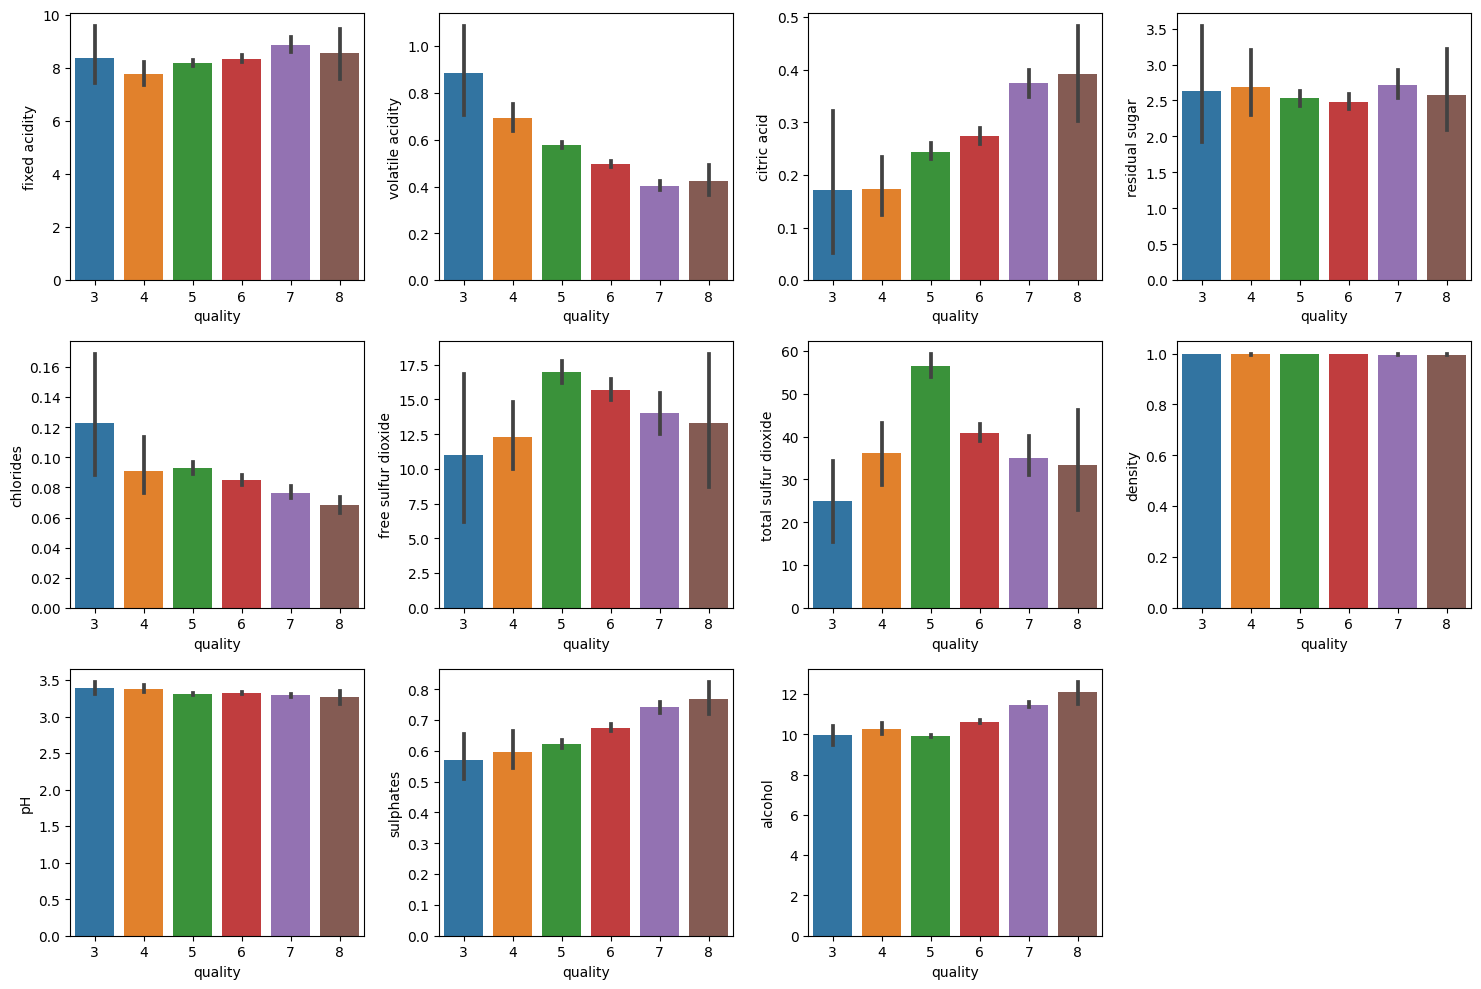

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

wine = pd.read_csv('winequality.csv')
wine.head()

wine.describe()

wine.info()

wine['quality'].value_counts()

fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()
plt.savefig('output.jpg',dpi=1000)

ranges = (2,6.5,8)
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

wine['quality'].value_counts()

good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:len(good_quality)]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df


new_df['quality'].value_counts()

new_df.corr()['quality'].sort_values(ascending=False)

from sklearn.model_selection import train_test_split

X = new_df.drop('quality',axis=1)
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))